In [1]:
from fastbook import *
import os

In [2]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1, 'http://www.birdsandblooms.com/wp-content/uploads/2015/07/IMG_5119.jpg')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): 
    download_url(urls[0], dest, show_progress=False)

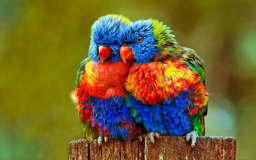

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)


In [5]:
searches = 'forest', 'bird'
path = Path('bird_or_not')
if not path.exists():
    path.mkdir(exist_ok=True)
for o in searches:
    dest = (path/o)
    if not dest.exists():
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)
        

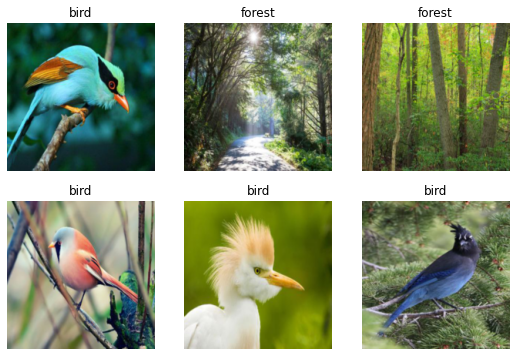

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]

).dataloaders(path)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, arch=resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.667765,0.787709,0.246753,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.115676,0.107169,0.012987,00:35
1,0.068233,0.051532,0.012987,00:27
2,0.046341,0.037384,0.012987,00:26


In [8]:
is_bird, _,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9996


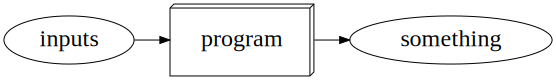

In [15]:
# didn't know you could do this...
gv2('''program[shape=box3d width=2 height=1]
inputs->program->something''')